In [26]:
# Boros Tamás 
# n0mb0a 
#
# Adatelemzés és adatbányászat 2019 
#
# A feladatom adathalmaza 4 különboző ország (USA, Canada, Magyarország, Svájc) egy-egy kórházának kardiológiai
# betegségben szendvedő pácienseinek adatait tartalmazza.
# A célom, hogy vizsgáljam, hogy milyen csoportokat lehet létrehozni a koleszterinszint
# és az életkor függvényében.

import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

column_names = ['age','sex','cp','trestbps','chol','thalach']
print(os.listdir("./input"))
people_data = pd.read_csv('./input/data.csv') 
people_df = pd.DataFrame(people_data)



['cars.csv', 'amazon.csv', 'amazonf.csv', 'Mall_Customers.csv', 'data.csv', 'mall-customers.zip', 'minute-weather.zip', 'heart-attack-prediction.zip', 'weather.csv']


In [3]:
people_df.head()

,age,sex,cp,trestbps,chol,thalach
0,28,1,2,130,132,185
1,29,1,2,120,243,160
2,30,0,1,170,237,170
3,31,0,2,100,219,150
4,32,0,2,105,198,165


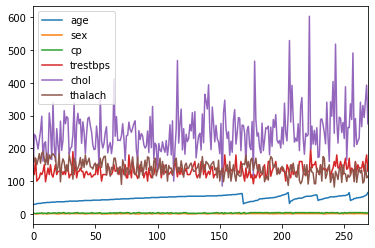

In [3]:
people_df.plot()

In [107]:
people_df.describe()

,age,sex,cp,trestbps,chol,thalach
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,47.777778,0.729630,2.996296,132.488889,250.637037,139.155556
std,7.803980,0.444976,0.973623,17.563635,67.693394,23.486251
min,28.000000,0.000000,1.000000,92.000000,85.000000,82.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,122.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,140.000000
75%,54.000000,1.000000,4.000000,140.000000,281.750000,155.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,190.000000


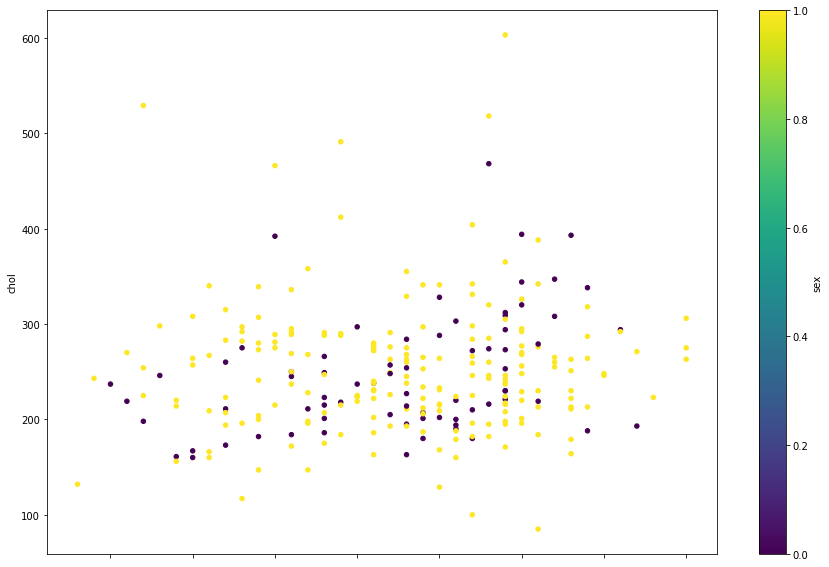

In [27]:
people_df.plot.scatter(x = 'age', y = 'chol', c= 'sex', figsize=(15,10), colormap='viridis')
# Az adathalmazzal való ismerkedés végett kirajzoltattam, hogy hogyan alakul a koleszterin szint a kor függvényében.
# A sárga pontok férfiakat, a kékek nőket jelentenek.

In [31]:
X = people_df.iloc[:, [0, 1, 4]].values
# Az adathalmazból kiemeltem a kor, a nem és a koleszterin szint oszlopokat

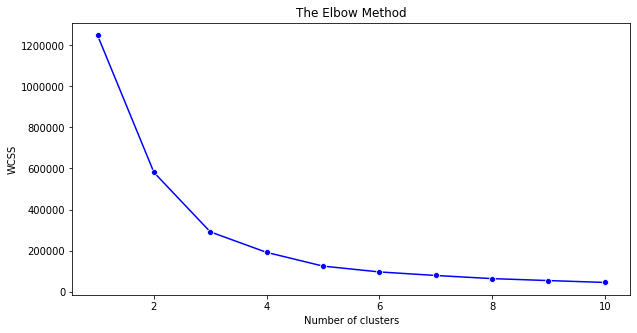

In [32]:
# Az elbow method-ot felhasználva megbecsülöm az optimális cluster számot,
# amely a 2 vagy a 3. Én a 2-őt választottam

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = None)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    
    

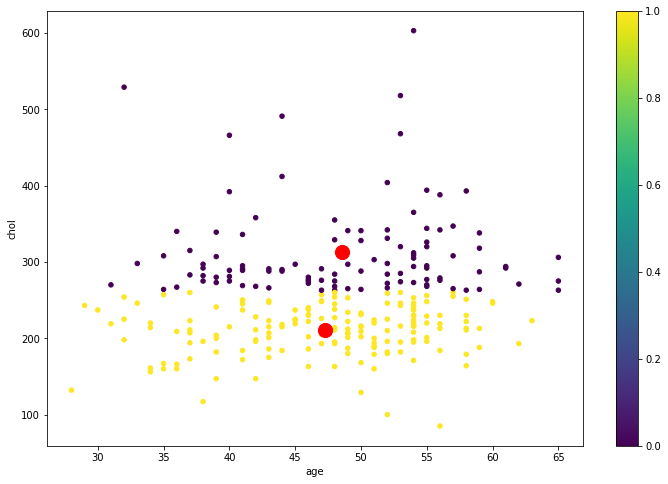

In [33]:
# K-Means illesztése

kmeans = KMeans(n_clusters=2, init = 'k-means++', max_iter = 100, random_state = None).fit(X)

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(people_df.iloc[:,[0,1,4]].columns.values))

fig, ax = plt.subplots(1, 1)

people_df.plot.scatter(x = 'age', y = 'chol',  c=kmeans.labels_, figsize=(12,8), colormap='viridis', ax=ax, mark_right=False)

centroids_df.plot.scatter(x = 'age', y = 'chol', ax = ax,  s = 200, mark_right=False, color='red')

# A normál koleszterin szint az amerikai ajánlás szerint 200 alatt van. 200 és 240 között határeset. 240 felett
# pedig magasnak számít. Kát klaszterrel jól elkülöníthetőek a 240 alatti (kvázi normális vagy elmegy kategóriájú)
# és az e-feletti, azaz magas értékek. 
# Életkort tekintve 30-tól 60-ig találunk betegeket normál és magas koleszterin szinttel is.

   age  chol  sex  trestbps  Cl_db
0   28   132    1       130     -1
1   29   243    1       120      0
2   30   237    0       170      1
3   31   219    0       100      1
4   32   198    0       105      1
number of labels:  {0, 1, -1}


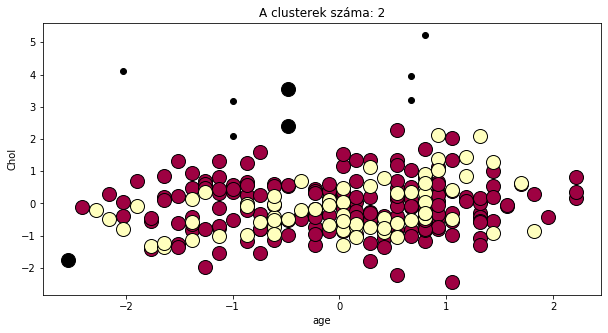

In [146]:
# DBSCAN-es rész
# DBSCAN-es rész

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

cluster_data = people_df[['age','chol','sex']]
cluster_data = np.array(cluster_data, dtype=np.float64)
cluster_data = StandardScaler().fit_transform(cluster_data)

db = DBSCAN(eps=0.8, min_samples=3).fit(cluster_data)

labels = db.labels_
people_df['Cl_db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

print(people_df[['age','chol','sex','trestbps','Cl_db']].head())

print("label numbers: ", set(labels))
# A "-1" a outliereket jelöli

uniq_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(uniq_labels))]

fig= plt.figure(figsize=(10,5))

for k, col in zip(uniq_labels, colors):
    if k == -1:
        # A fekete szín a zajt fogja jelenteni
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    
    xy = cluster_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    xy = cluster_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    
plt.xlabel('age')
plt.ylabel('Chol')

plt.title('A clusterek száma: %d' % realClusterNum)
plt.show()


# A DBSCAN eljárás nem hozott olyan szemléletes eredményt ebben az esetben, mint a K-means. Bár a világosabb 
# core pointok által létrehozott klaszter jelezhet egyfajta tendenciát a kardiológiai betegek körében.
# A kiugró outlier értékeket szépen megtalálta.